In [33]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import argparse
import os

In [34]:
DIR_TRAIN = "dataset-cropped/Train/"
DIR_TEST = "dataset-cropped/Test/"

In [35]:
label_data = pd.read_csv("dataset-cropped/label.csv")
label_data

,tps,suara_paslon_1,suara_paslon_2,suara_paslon_3
0,TPS_001,159,9,2
1,TPS_002,112,87,2
2,TPS_003,173,27,3
3,TPS_004,207,20,3
4,TPS_005,213,30,4
...,...,...,...,...
495,TPS_496,11,150,60
496,TPS_497,20,105,18
497,TPS_498,11,168,24
498,TPS_499,39,130,32


In [36]:
images = []
labels = []

df = pd.read_csv("dataset-cropped/label.csv")

for tps in os.listdir(DIR_TRAIN):
    for paslon in os.listdir(os.path.join(DIR_TRAIN, tps)):
        for section in os.listdir(os.path.join(DIR_TRAIN, tps, paslon)):
            path = os.path.join(DIR_TRAIN, tps, paslon, section)

            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (40, 240))
            img = cv2.GaussianBlur(img, (5, 5), 0)
            # imt = cv2.medianBlur(img, 5)

            th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 19, 2)
            # cv2.floodFill(th, None, (0, 0), 123, )
            
            th = th / 255.0
            images.append(th)

    
    curr_tps = df[df['tps'] == tps]
    for col in (['suara_paslon_1', 'suara_paslon_2', 'suara_paslon_3']):
        label_str = '{:03d}'.format(curr_tps[col].values[0])
        labels.extend([int(n) for n in label_str])

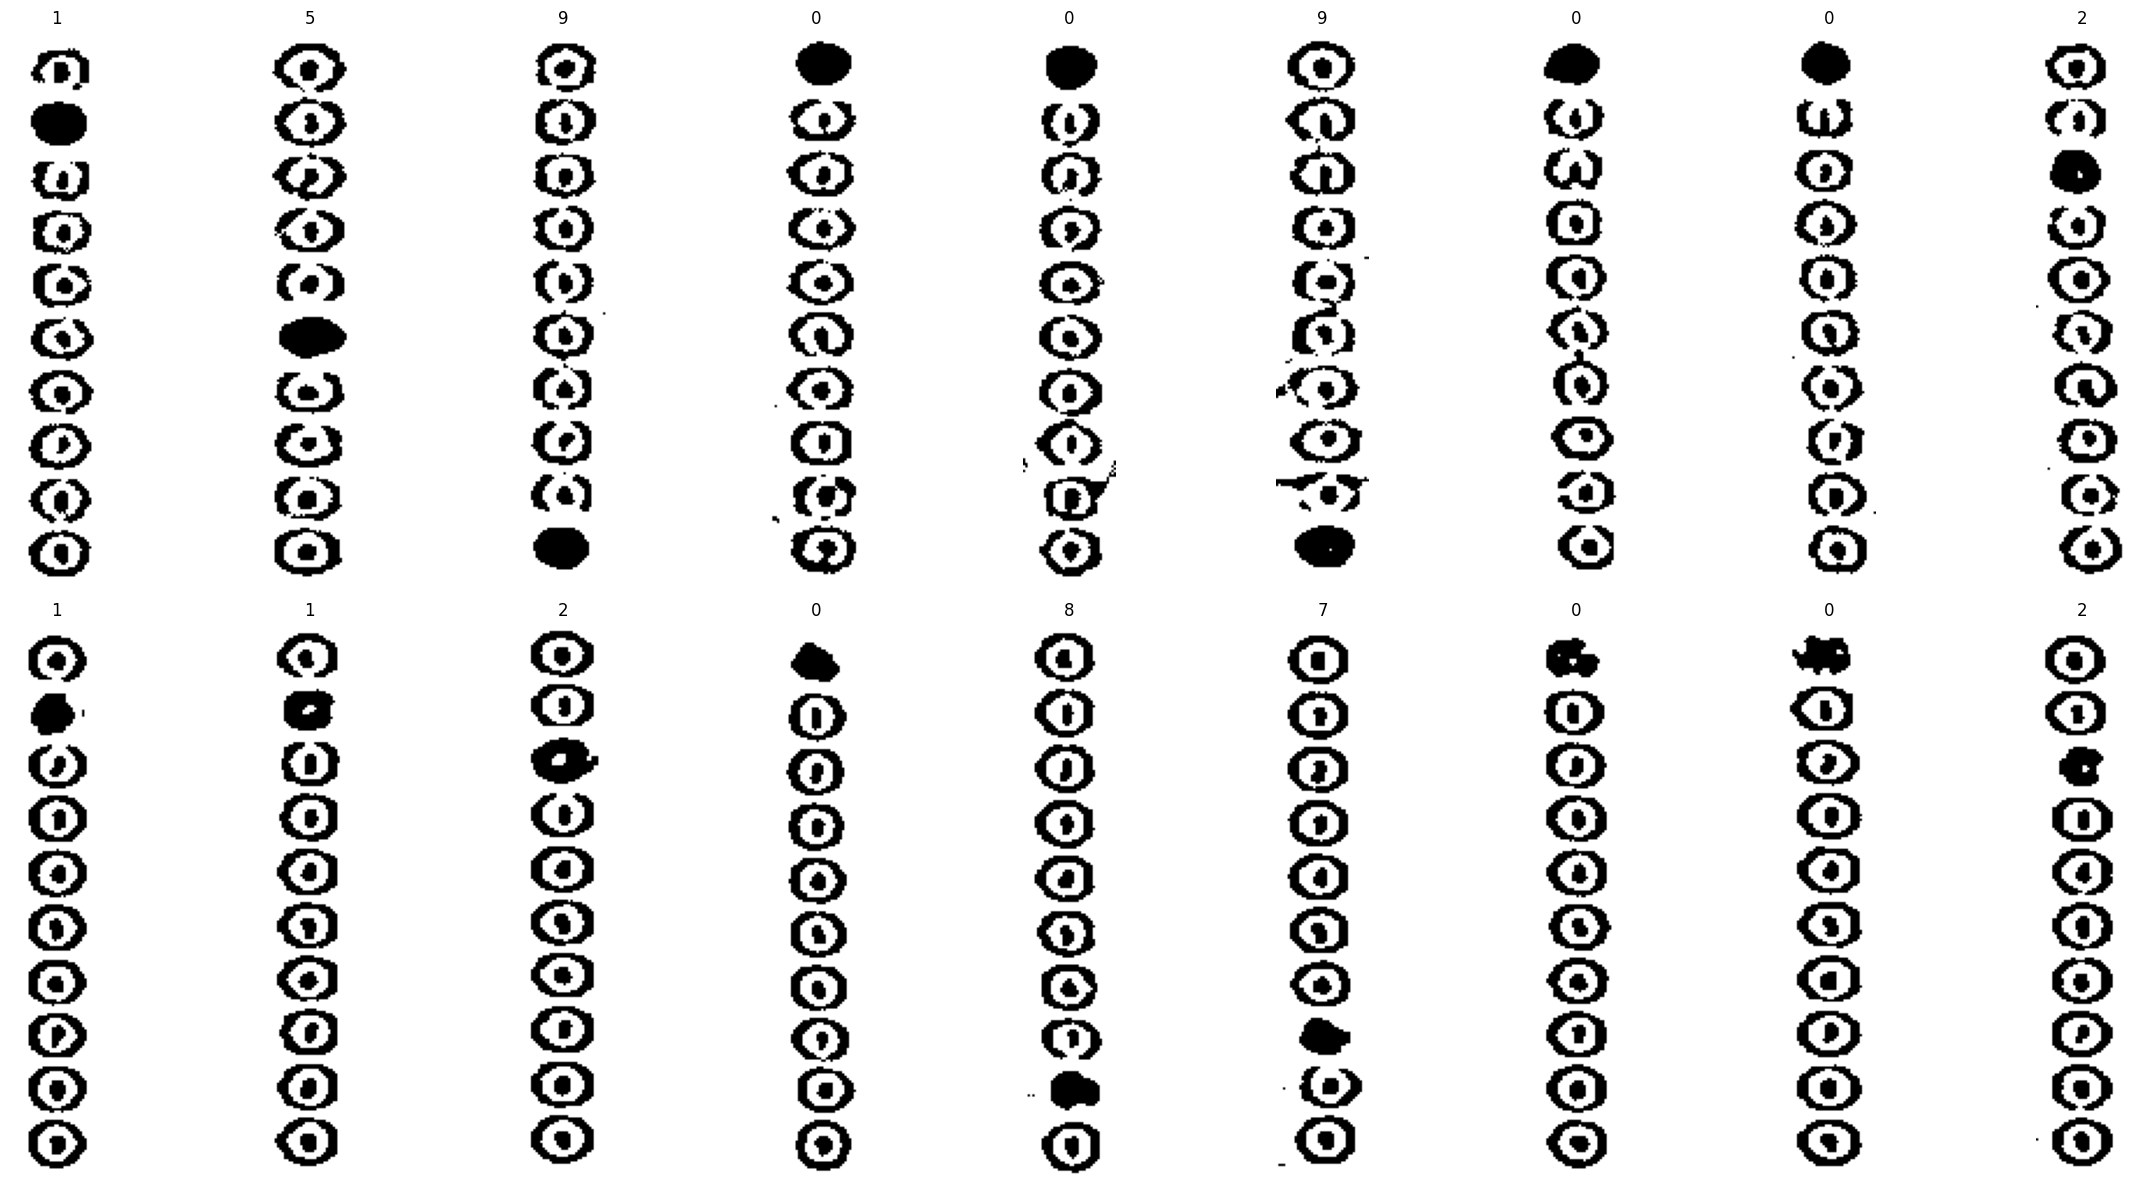

In [37]:
plt.figure(figsize=(24, 12))
for i in range (18):
    plt.subplot(2, 9, i + 1)
    plt.axis("off")
    fig = plt.imshow(images[i], 'gray')
    plt.title(labels[i])

plt.tight_layout()
plt.show()

In [38]:
images = np.array(images)
labels = np.array(labels)

In [39]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

x_train, y_train = (images, labels)

x_train = x_train.reshape(images.shape[0], -1)
# y_train = to_categorical(y_train, num_classes=10)
# x_train = np.repeat(x_train[..., np.newaxis], 3, -1)

In [40]:
# HYPERPARAMETERS
C = [0.1,1,10,100]
GAMMA = [0.0001,0.001,0.1,1]
KERNEL = ['rbf','poly']

In [41]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

param_grid = {'C':C, 'gamma': GAMMA, 'kernel': KERNEL}
svc = svm.SVC(probability=True)

model = GridSearchCV(svc, param_grid)

In [42]:
print(x_train.shape)

(4158, 9600)


In [ ]:
model.fit(x_train, y_train)

print("Best Parameters: ", model.best_params_)

In [ ]:
# from sklearn.model_selection import cross_val_score

# cross_val = cross_val_score(model, x_train, y_train, cv=5)

# print("Cross Validation Score: ", cross_val)
# print("Mean Accuracy: ", cross_val.mean())

In [ ]:
import pickle

with open('models/svm.pickle', 'wb') as f:
    pickle.dump(model, f)
    
print(f"Model saved to svm.joblib")

Model saved to svm.joblib
